<a href="https://colab.research.google.com/github/davidmuna/Hypothesis-Testing/blob/master/Autolib_Hypothesis_Testing_Notebook_week_4_Core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="green">*Working as a data scientist in an electric car-sharing service company.I will work as a Data Scientist to investigate a claim about the blue cars from the provided Autolib dataset.*</font>

# Autolib Car Sharing Service Hypothesis Testing 

*   Link to [Report](https://docs.google.com/document/d/1o8l1XDqZUZ0TZUNf6f0WIXxjjizHGrSyBHcgs-plJVM/edit?usp=sharing)


## 1.0 Importing our Libraries

In [51]:
# Importing the pandas and numpy libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.1 Loading the Dataset from our CSV files





*   Dataset link for download or access: [http://bit.ly/DSCoreAutolibDataset

*   Dataset Description link for download or access:[http://bit.ly/DSCoreAutolibDatasetGlossary







Creating and reading our DataFrame





In [52]:
# reading the dataset and creating a dataframe
autolib = pd.read_csv('http://bit.ly/DSCoreAutolibDataset')

## 1.2 Previewing our dataframe and accessing information about it


In [53]:
# Previewing our dataframe (3 rows)
autolib.head(3)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27


## 1.3 Accessing Information about our Dataset

In [54]:
#Accessing information about our data
autolib.info()
autolib.shape

#Dataset has no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


(16085, 13)

## 1.4 <font color="green">Cleaning and dealing with outliers, anomalies and missing data</font>

In [55]:
# Renaming columns, fixing syntax errors and putting column names them in lower case for standardisation

autolib.columns = autolib.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('1.4', '14').str.replace('_sum', '')

#Changing date column to datetime
autolib['date']= pd.to_datetime(autolib['date']) 

#Dropping unwanted columns
autolib1 = autolib.drop(columns=['utilib_taken','utilib_returned','utilib_14_taken','utilib_14_returned','bluecars_returned','slots_taken'])

#Date column is the correct data type, let’s set it as the DataFrame’s index
autolib1 = autolib1.set_index('date')
autolib1.head(3)

,postal_code,n_daily_data_points,dayofweek,day_type,bluecars_taken,slots_freed
date,,,,,,
2018-01-01,75001,1440,0,weekday,110,22
2018-01-02,75001,1438,1,weekday,98,23
2018-01-03,75001,1439,2,weekday,138,27


In [56]:
#Viewing the tail
autolib1.tail(3)

,postal_code,n_daily_data_points,dayofweek,day_type,bluecars_taken,slots_freed
date,,,,,,
2018-06-17,95880,1440,6,weekend,33,0
2018-06-18,95880,1440,0,weekday,11,0
2018-06-19,95880,1370,1,weekday,2,0


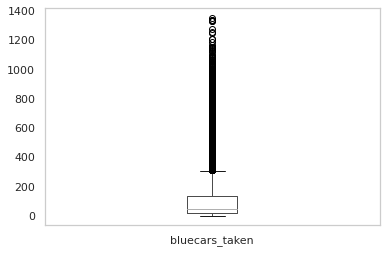

In [57]:
#Viewing the presense or absense of Outliers using a box plot for bluecars_taken

autolib1.boxplot(column =['bluecars_taken'], grid = False) 

In [58]:
#Skewness for bluecars_taken
autolib1['bluecars_taken'].skew()

#bluecars_taken is skewed to the right indicating outliers in the upper quantile and that its slightly not normally distributed

2.4063548974959086

In [59]:
#Checking for Anomalies
#Unique values check
print(autolib1.nunique())

postal_code            104
n_daily_data_points     23
dayofweek                7
day_type                 2
bluecars_taken         932
slots_freed            297
dtype: int64


*   Unique values in the columns looks okay. No anomalies
*   The outliers in n_daily_data_points	and bluecars_taken seem to be a large due to the skewness.However, the blucars_taken is slightly skewed so we'll remove the outliers in the upper quantile range and check skewness again for normality.
*   For slots_freed, there are a large number of outliers as well hence we'll retain them
*   There are no missing values







#### 1.5 RESEARCH QUESTION:

TO IDENTIFY THE TOP THREE POSTAL CODE/AREAS THAT HAVE THE HIGHEST NUMBER OF BLUE CARS TAKEN DURING THE WEEKDAY AND DETERMINE IF THEY ARE THE SAME FOR THE 75015 & 75017 POSTAL CODE AREAS.

## <font color="green">Univariate Summaries<font/>

In [60]:
#Identifying number of blucars taken in every area/postal code during the weekend sorted in descending order
#creating a filter variable for weekend
weekend = autolib1['day_type'] == 'weekend'

autolibweekend = autolib1[weekend].groupby('postal_code')['bluecars_taken'].sum().sort_values(ascending = False).reset_index(name = 'bluecars_taken').rename(columns = {'0':''})
autolibweekend = pd.DataFrame(autolibweekend)

#filtering areas 75015 and 75017
area_15 = autolibweekend['postal_code']==75015
area_17 = autolibweekend['postal_code']==75017

autolibweekend[area_15|area_17]

,postal_code,bluecars_taken
0,75015,47202
2,75017,36565


In [61]:
#Identifying number of blucars taken in every area/postal code during the weekday sorted in descending order
#Filter variable for weekday
weekday = autolib1['day_type'] == 'weekday'

autolibweekday = autolib1[weekday].groupby('postal_code')['bluecars_taken'].sum().sort_values(ascending = False).reset_index(name = 'bluecars_taken').rename(columns = {'0':''})
autolibweekday = pd.DataFrame(autolibweekday)

area_15 = autolibweekday['postal_code']==75015
area_17 = autolibweekday['postal_code']==75017

#filtering areas 75015 and 75017
area_17and15_weekday = autolibweekday[area_15|area_17]
area_17and15_weekday

,postal_code,bluecars_taken
0,75015,92723
2,75017,78016


Our period of choice is weekdays because we identified theres more activity on weekdays compared to weekends.

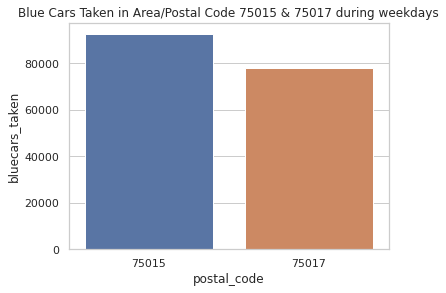

In [62]:
#bluecars taken for area/postal codes 75015 and 75017 bar chart on weekdays
sns.set(style="whitegrid")
plt.title("Blue Cars Taken in Area/Postal Code 75015 & 75017 during weekdays")
plt.tight_layout()
ax = sns.barplot(x="postal_code", y="bluecars_taken", data=area_17and15_weekday)

In [63]:
#Summary statistics for the dataset

autolib_summarystat = autolib1.drop(columns=['n_daily_data_points','day_type','slots_freed','dayofweek','postal_code'])
autolib_summarystat.describe()

,bluecars_taken
count,16085.000000
mean,125.926951
std,185.426579
min,0.000000
25%,20.000000
50%,46.000000
75%,135.000000
max,1352.000000


In [64]:
print("Population Variance for ", autolib_summarystat.var())
print("Population Median for ", autolib_summarystat.median())
print("Population Mode for ", autolib_summarystat.median())
print("Population Skew for ", autolib_summarystat.skew())
print("Population Kurtosis for ", autolib_summarystat.kurt())

Population Variance for  bluecars_taken    34383.016113
dtype: float64
Population Median for  bluecars_taken    46.0
dtype: float64
Population Mode for  bluecars_taken    46.0
dtype: float64
Population Skew for  bluecars_taken    2.406355
dtype: float64
Population Kurtosis for  bluecars_taken    6.172692
dtype: float64


## <font color="green">Bivariate Summaries<font/>

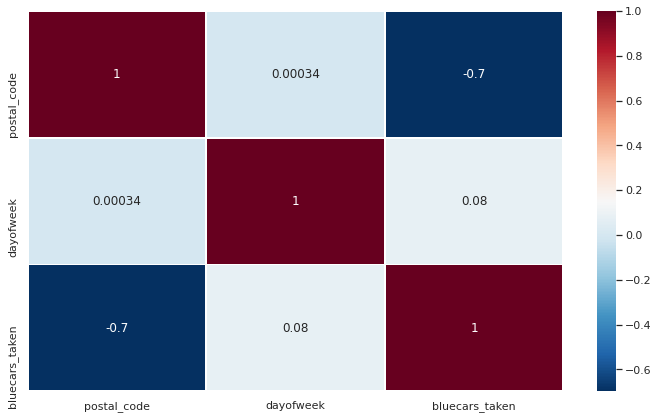

In [65]:
#Correlation Matrix
autolib_corr = autolib1.drop(columns=['n_daily_data_points','slots_freed'])

autolib_corr= autolib_corr.corr(method='pearson')

#Chosing the size of the heatmap
plt.figure(figsize = (12,7)) 

#Displaying correlations using the seaborn heatmap 
sns.heatmap(autolib_corr, 
            xticklabels=autolib_corr.columns,
            yticklabels=autolib_corr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.8)

#Theres a strong negative correlation between the postal code/area and the number of blue cars taken with a coefficient of -0.7

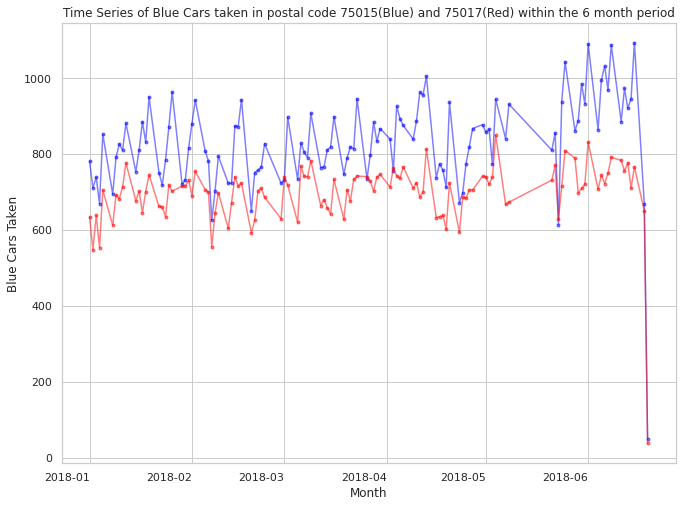

In [66]:
#Plotting a time series for bluecars taken during the weekday for postal codes 75015 and 75017
autolib2 = autolib1[weekday]

autolib3 = autolib2.drop(columns=['n_daily_data_points','day_type','slots_freed','dayofweek'])

area_75015 = autolib3['postal_code']==75015
area_75017 = autolib3['postal_code']==75017

autolib75015 = autolib3[area_75015]
autolib75017 = autolib3[area_75017]

axes = autolib75015['bluecars_taken'].plot(marker='.', alpha=0.5, linestyle='-', figsize=(11, 9), subplots=True, color='blue')
for ax in axes:
    ax.set_ylabel('Blue Cars Taken')
    ax.set_xlabel('Month')
    ax.set_title('Time Series of Blue Cars taken in postal code 75015(Blue) and 75017(Red) within the 6 month period')

axes2 = autolib75017['bluecars_taken'].plot(marker='.', alpha=0.5, linestyle='-', figsize=(11, 9), subplots=True, color='red')
for ax in axes2:
    ax.set_ylabel('Blue Cars Taken')
    ax.set_xlabel('Month')
    ax.set_title('Time Series of Blue Cars taken in postal code 75015(Blue) and 75017(Red) within the 6 month period')

Text(0.5, 1.0, 'Weekly Seasonality for Blue Cars Taken in Area/Postal Code 75015')

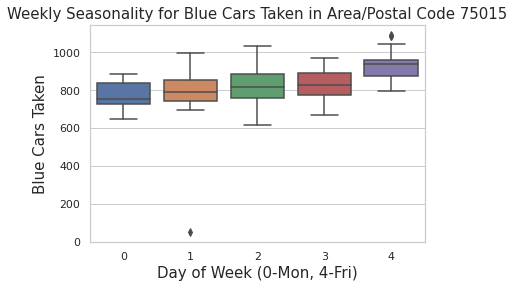

In [73]:
#Checking Time Series Seasonality by day of the weekday

autolib_dayseason = autolib2.drop(columns=['n_daily_data_points','day_type','slots_freed'])

area_season15 = autolib_dayseason['postal_code']==75015
area_season17 = autolib_dayseason['postal_code']==75017

autolib_dayseason15 = autolib_dayseason[area_75015]
autolib_dayseason17 = autolib_dayseason[area_75017]

sns.boxplot(data=autolib_dayseason15, x='dayofweek', y='bluecars_taken');
plt.xlabel("Day of Week (0-Mon, 4-Fri)", fontsize=15)
plt.ylabel("Blue Cars Taken", fontsize=15)
plt.title("Weekly Seasonality for Blue Cars Taken in Area/Postal Code 75015", fontsize=15)

Weekly Seasonality for Area 75015 indicates a steady increase in number of bluecars taken from Monday to Friday. Friday being the highest. 

Text(0.5, 1.0, 'Weekly Seasonality for Blue Cars Taken in Area/Postal Code 75017')

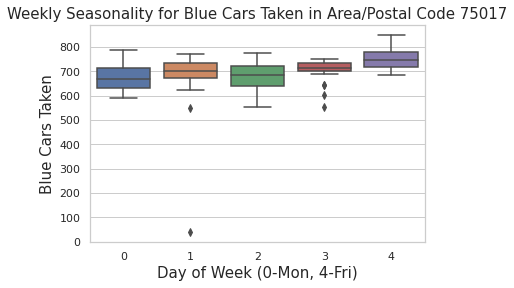

In [74]:
sns.boxplot(data=autolib_dayseason17, x='dayofweek', y='bluecars_taken');
plt.xlabel("Day of Week (0-Mon, 4-Fri)", fontsize=15)
plt.ylabel("Blue Cars Taken", fontsize=15)
plt.title("Weekly Seasonality for Blue Cars Taken in Area/Postal Code 75017", fontsize=15)

Weekly Seasonality for Area 75017 indicates less Bluecars taken on Thursday and Wednesday. So there's no steady increase from Monday to Friday.

Overal Analysis indicates that Blue Cars taken in area 75015 is more than Blue Cars taken in area 75017

## 1.6 Implementing the solution through Hypothesis Testing

#### <font color="green">Formulating the Null and Alternative Hypotheses<font/>



*   Ho : The number of Blue Cars taken in area/postal code 75015 and 75015 are the same


*   Ha : The number of Blue Cars taken in area/postal code 75015 is different from Blue Cars taken in area/postal code 75017 (CLAIM)



Writing the Ho and Ha in mathematical form noting that Null Hypotheses are identified by equality

1.   Ho : Bluecarstaken in 75015 = Bluecarstaken in 75017 

2.   Ha : Bluecarstaken in 75015 != Bluecarstaken in 75017(CLAIM)



#### <font color="green">Choosing Sample Size and Level of Significance as 5%<font/>

Sampling technique used is Stratified Random sampling to break the population into area 75015 and 75017 subgroups and obtaining a simple random sample from each group.

In [69]:
#Merging the two subgroup original population datasets autolib75015 and autolib75017 to population
population = pd.concat([autolib75015,autolib75017])
print("population is ",population.groupby('postal_code').count())

population is               bluecars_taken
postal_code                
75015                   112
75017                   112


In [94]:
# Stratified sample
strat_sample = population.groupby('postal_code', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.3))

#Proportion of the stratified sample
print(strat_sample['postal_code'].value_counts())

75017    34
75015    34
Name: postal_code, dtype: int64


Our sample size is 68 out of 224

#### <font color="green">Choosing the Test Statistic and finding the P Value<font/>

Test Statistic chosen is the One Sample Z-Test because we have the population standard deviation from univariate summary statistics

In [95]:
from scipy.stats import norm
from scipy import stats
import math

pop_mean = 125.93   #From summary statistics in univariate summary
n = 68
sample_mean = strat_sample['bluecars_taken'].mean()
alpha = 0.05
pop_std = 185.42  #From summary statistics in univariate summary

#Calculating Z score
zscore = ( sample_mean-pop_mean ) / 185.42

#Finding the P Value given that the Null Hypothesis is TRUE
pval = stats.norm.cdf(zscore) * 2  #Since its a two tailed test as per the alternative Ha (ie presence of !=)
print(" Z-Score is :", zscore)
print(" P Value is :", pval)

 Z-Score is : 3.4891185036197636
 P Value is : 1.9995153837440762


In [97]:
#Constructing a confidence interval around the parameter
from scipy.stats import sem, t
from scipy import mean
confidence = 0.95
data = strat_sample['bluecars_taken']

n = len(data)
m = mean(data)
std_err = sem(data)
h = std_err * t.ppf((1 + confidence) / 2, n - 1)

start = m - h
end = m + h

print("The start is :",round(start))
print("The end is :",round(end))

The start is : 747.0
The end is : 799.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  


#### <font color="green">Interpreting P Value and drawing a conclusion<font/>

Theres the possibility of having Type Two Errors in this Hypothesis Test in the event that:

 *   We fail to reject the null hypothesis when in real sense it is false




In [72]:
if pval >alpha:
  print("We fail to reject null hypothesis")
  print("Conclusion:")
  print("Theres no sufficient statistical evidence to support the claim that Bluecarstaken in 75015 != Bluecarstaken in 75017 at the 5% level of significance")
else:
  print("We reject null the hypothesis")
  print("Conclusion:")
  print("Theres is sufficient statistical evidence to support the claim that Bluecarstaken in 75015 != Bluecarstaken in 75017 at the 5% level of significance")

We fail to reject null hypothesis
Conclusion:
Theres no sufficient statistical evidence to support the claim that Bluecarstaken in 75015 != Bluecarstaken in 75017 at the 5% level of significance


#### Conclusion:
Theres no sufficient statistical evidence to support the claim that Bluecarstaken in 75015 != Bluecarstaken in 75017 at the 5% level of significance

*   This is a Type II error because the Null Hypothesis is False


